## Preparation

Loading the dataset about breast cancer:


*   radius (mean of distances from center to points on the perimeter)
*   texture (standard deviation of gray-scale values)

* perimeter

* area

* smoothness (local variation in radius lengths)

* compactness (perimeter^2 / area - 1.0)

* concavity (severity of concave portions of the contour)

* concave points (number of concave portions of the contour)

* symmetry

* fractal dimension (“coastline approximation” - 1)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter(action="ignore")

In [80]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                            columns=np.append(cancer['feature_names'], ['target']))

In [81]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


## Data Inspection/Exploration

In [82]:
#df.replace({'target': 1}, "benign", inplace=True)
#df.replace({'target': 0}, "malignant", inplace=True)

In [83]:
df['target'].value_counts()


1.0    357
0.0    212
Name: target, dtype: int64

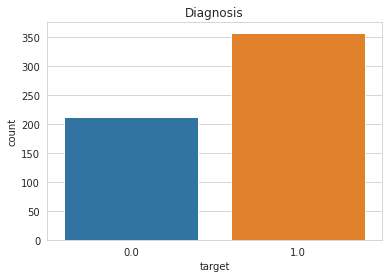

In [84]:
# inspect the distribution

sns.countplot(data = df, x='target')
plt.title('Diagnosis');

In [85]:
#inspect the data and columns
# count number of empty values in each column
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [86]:
#look at the data types to see which columns need to be encoded
df.dtypes


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [87]:
#define X and y
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

## 1) Split the Data into Train/Test

In [88]:
from sklearn.model_selection import train_test_split
# use random state 42
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)


(398, 30)
(171, 30)
(171,)
(398,)


In [89]:
# feature scaling - standardscaler
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# scaled arrays



## Create Classifier

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [103]:

#adding the input and first hidden layer

model=Sequential()
model.add(Dense(15,activation="relu",input_dim=30))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))



In [92]:
#compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [93]:
#show model summary


In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 96        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 7         
Total params: 568
Trainable params: 568
Non-trainable params: 0
_________________________________________________________________


In [95]:
# see if you can reproduce the parameters from input to hidden layer:

print(X_train.shape[1] * 15 + 15)

#(dimension of W_1)

# first hidden to second hidden layer
print(15 *6 +6)
#(dimension of W_2))


# second hidden to output layer
print(6 * 1 +1)
#(dimension of W_3 )

465
96
7


In [96]:
#fit the model
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))



Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.6693 - accuracy: 0.6332 - val_loss: 0.6060 - val_accuracy: 0.6491
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5580 - accuracy: 0.6583 - val_loss: 0.5143 - val_accuracy: 0.7018
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7186 - val_loss: 0.4484 - val_accuracy: 0.7544
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4347 - accuracy: 0.7839 - val_loss: 0.3998 - val_accuracy: 0.8012
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3967 - accuracy: 0.8392 - val_loss: 0.3619 - val_accuracy: 0.8596
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3679 - accuracy: 0.8693 - val_loss: 0.3344 - val_accuracy: 0.9064
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.8844 - val_loss: 0.3096 - val_accuracy: 0.9181
Epoch 8/100


In [97]:
#evaluate the model and save it into the variable score
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.06605783104896545, 0.9824561476707458]

The metrics that *evaluate()* gives us depend on the input argument *metrics* that we used when setting up our NN. Keras knows several other metrics (see [Keras doc. for details](https://keras.io/metrics/)) but not all known metrics are supported for training the NN. Between, you can also extend the set of metrics with customer metrics (see this [example](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/) if interested.).

We also have access to model performance results via the result of *model.fit()*, that is our variable *story*.

In [98]:
# Now install the tensorflow addons and define the following metrics. You have AUC,Precision and Recall in Keras Metrics but F1 you will need to get it from tensorflow addons


In [99]:
!pip install tensorflow-addons



In [100]:
import keras
import tensorflow as tf 
import tensorflow_addons as tfa


metrics = [ 
    #keras.metrics.Precision(),
    #keras.metrics.Recall(),
    keras.metrics.AUC(),
    #tfa.metrics.F1Score(
    #    name="f1_micro",
    #    average="micro",
    #    num_classes=1,
    #    threshold=0.5,
    #),
    #tfa.metrics.F1Score(
    #    name="f1_weighted",
    #    average="weighted",
    #    num_classes=1,
    #    threshold=0.5,
    #),
]

In [104]:
# rerun the mmodel with the above defined metrics in your complie call
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy', keras.metrics.AUC()])

story = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))


Epoch 1/100
13/13 [==============================] - 1s 26ms/step - loss: 0.6746 - accuracy: 0.5176 - auc_4: 0.6663 - val_loss: 0.5976 - val_accuracy: 0.6725 - val_auc_4: 0.7925
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5510 - accuracy: 0.7161 - auc_4: 0.8505 - val_loss: 0.4985 - val_accuracy: 0.8480 - val_auc_4: 0.9347
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4681 - accuracy: 0.8593 - auc_4: 0.9384 - val_loss: 0.4258 - val_accuracy: 0.9298 - val_auc_4: 0.9706
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3920 - accuracy: 0.9171 - auc_4: 0.9704 - val_loss: 0.3531 - val_accuracy: 0.9357 - val_auc_4: 0.9787
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3237 - accuracy: 0.9271 - auc_4: 0.9765 - val_loss: 0.2895 - val_accuracy: 0.9474 - val_auc_4: 0.9832
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2688 - accuracy: 0.9372 - auc_4: 0.9789

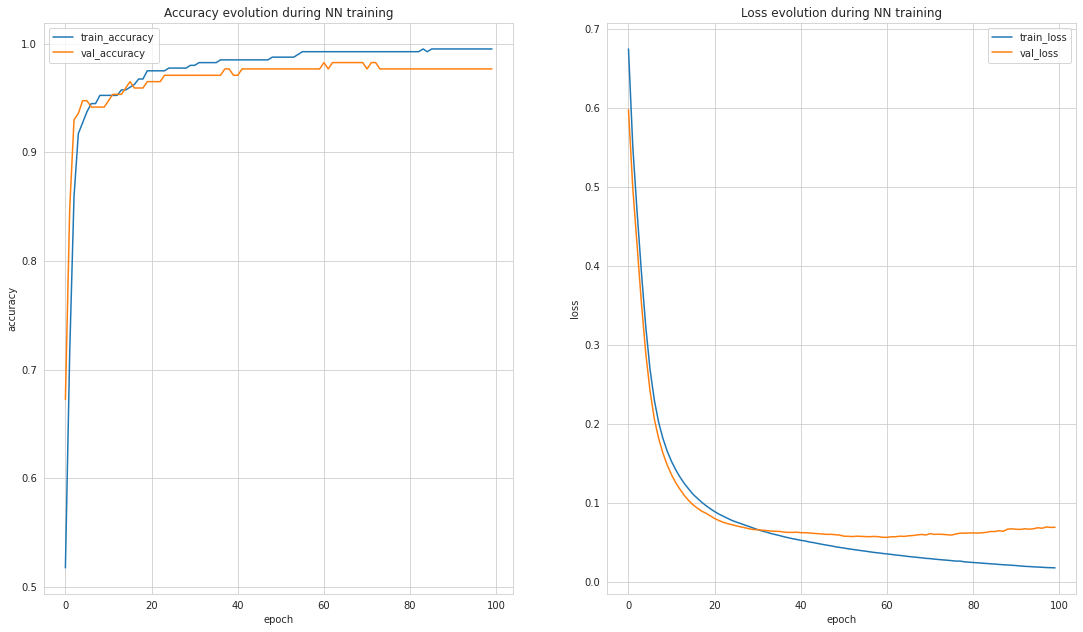

In [105]:
# print Test Loss and Accuracy and plot the history
import matplotlib.pyplot as plt

def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'val_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')
    
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'val_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    plt.show()

show_history(story)

Typically validation loss should be similar to but slightly higher than training loss. As long as validation loss is lower than or even equal to training loss one should keep doing more training. If training loss is reducing without increase in validation loss then again keep doing more training. If validation loss starts increasing then it is time to stop. Some over-fitting is nearly always a good thing. All that matters in the end is: is the validation loss as low as you can get it!

If overall accuracy still not acceptable then review mistakes model is making and think of what can one change: More data? More / different data augmentations? Different architecture?



In [106]:
# Compute predictions of X_test
yhat = model.predict(X_test)
yhat

array([[9.58005786e-01],
       [2.42273011e-08],
       [8.80501102e-05],
       [9.99769688e-01],
       [9.99946594e-01],
       [4.60487175e-15],
       [2.69571637e-13],
       [5.78492880e-04],
       [2.61843026e-01],
       [9.99860048e-01],
       [6.90617800e-01],
       [6.56604767e-04],
       [9.96563256e-01],
       [1.86347961e-03],
       [9.99834180e-01],
       [1.46089201e-06],
       [9.99746561e-01],
       [9.99976277e-01],
       [9.99998927e-01],
       [2.39539877e-09],
       [9.80181575e-01],
       [9.95892048e-01],
       [3.33773590e-13],
       [9.99690771e-01],
       [9.99325037e-01],
       [9.99775529e-01],
       [9.99849558e-01],
       [9.99063849e-01],
       [9.97559667e-01],
       [1.89319316e-09],
       [9.99274194e-01],
       [9.99948144e-01],
       [9.98904347e-01],
       [9.98590827e-01],
       [9.99903619e-01],
       [9.98852015e-01],
       [6.90257549e-03],
       [9.98767972e-01],
       [3.65681331e-07],
       [9.67260718e-01],


In [107]:
# Finding the most probable class
yhat_c = (yhat > 0.5)
print(yhat_c)


[[ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 

In [108]:
# print the confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,yhat_c)
score = accuracy_score(y_test,yhat_c)
print(cm)
print('score is:',score)


[[ 62   1]
 [  3 105]]
score is: 0.9766081871345029


In [72]:
 #print calssification report
 from sklearn.metrics import classification_report

 print(classification_report(y_test, yhat_c))



              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171
 samples avg       0.98      0.98      0.98       171




# OPTION 2
Lets implement the same model with softmax output activation and 2 nodes. REMEMBER, the binary classification case is a special case of the multiclass classification case with 2 classes. so the softmax function with only 2 classes will give the sigmoid function. 
MEaning, when you have a binary classification problem, have 2 options
1.  output activation sigmoid, 1 node and binary_crossentropy loss
2. output activation softmax, 2 nodes and categorical_crossentropy loss

In [109]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# Prepare the target variable

# if you use categorical crossentropy loss, you have to reshape the target variable to the dimension of the classes,
# ie. OneHot encode the Target
# Note: you can leave the target as normal integers, but then you have to use 'sparse_categorical_crossentropy' loss
dummy_y = np_utils.to_categorical(y)
dummy_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [123]:
from sklearn.model_selection import train_test_split
# use random state 42
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)


(398, 30)
(171, 30)
(171,)
(398,)


In [124]:
# feature scaling - standardscaler
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# scaled arrays

In [125]:
model=Sequential()
model.add(Dense(15,activation="relu",input_dim=30))
model.add(Dense(6,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [126]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [127]:
#fit the model
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))


Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.6824 - accuracy: 0.5854 - val_loss: 0.5961 - val_accuracy: 0.7193
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5074 - accuracy: 0.7940 - val_loss: 0.4558 - val_accuracy: 0.8304
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4038 - accuracy: 0.8744 - val_loss: 0.3688 - val_accuracy: 0.8947
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3377 - accuracy: 0.8970 - val_loss: 0.3061 - val_accuracy: 0.9064
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2882 - accuracy: 0.9070 - val_loss: 0.2581 - val_accuracy: 0.9123
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.9221 - val_loss: 0.2210 - val_accuracy: 0.9357
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2198 - accuracy: 0.9372 - val_loss: 0.1915 - val_accuracy: 0.9474
Epoch 8/100


In [128]:
# Compute predictions of X_test, here it is a 2 dimensional array: for each datapoint we get the probability of 
# it belonging to class 0 and to class 1. Note: compare the output to the previous yhat. Previously with 1 output neuron, 
#we got the prob only for class 1.  
yhat = model.predict(X_test)
yhat

array([[1.95391849e-02, 9.80460823e-01],
       [1.00000000e+00, 4.18655692e-12],
       [1.00000000e+00, 1.47374335e-08],
       [6.29030546e-05, 9.99937057e-01],
       [9.27261226e-06, 9.99990702e-01],
       [1.00000000e+00, 6.60413752e-28],
       [1.00000000e+00, 6.54429515e-22],
       [9.99932170e-01, 6.77804637e-05],
       [7.57163405e-01, 2.42836580e-01],
       [4.34116737e-05, 9.99956608e-01],
       [4.24893051e-02, 9.57510769e-01],
       [9.99961972e-01, 3.80745587e-05],
       [1.54742191e-03, 9.98452544e-01],
       [9.99711096e-01, 2.88920564e-04],
       [3.23613858e-05, 9.99967694e-01],
       [9.99999166e-01, 8.16380066e-07],
       [6.33589661e-05, 9.99936581e-01],
       [4.51023652e-06, 9.99995470e-01],
       [5.50071718e-07, 9.99999404e-01],
       [1.00000000e+00, 3.45875607e-16],
       [3.04132774e-02, 9.69586670e-01],
       [2.48600822e-03, 9.97514009e-01],
       [1.00000000e+00, 1.00184445e-22],
       [1.08735039e-04, 9.99891281e-01],
       [3.484346

In [116]:
# Finding the most probable class
yhat_c = np.argmax(yhat, axis=1)
print(yhat_c)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [118]:
y_test.shape

(171, 2)

In [119]:
true_label = np.argmax(y_test,axis = 1)


In [120]:

cm = confusion_matrix(true_label,yhat_c)

score = accuracy_score(true_label,yhat_c)
print(cm)
print('score is:',score)


[[ 62   1]
 [  0 108]]
score is: 0.9941520467836257
